# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [76]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup

import matplotlib.pyplot as plt
import pandas as pd
import os


In [77]:
# Our intructor suggested the approach of having the chromedriver as part of the distribution materials for production scraping projects 
# for help with things like version differences for each project.  It also helps address any environment issues to set the
# relative location of the chromedriver explicitly.
#  
# Define the relative path to the chromedriver
rel_path = '../../../chromedriver/chromedriver.exe'

# Use os to get the full path to the driver
chromedriver_path = os.path.abspath(rel_path)

# Add the chromedriver path to the system PATH
os.environ["PATH"] += os.pathsep + chromedriver_path


In [79]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [81]:
# Visit the website

url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [84]:
# Parse the HTML
html = browser.html

# Create a Beautiful Soup object

html_soup = soup(html, 'html.parser')


In [86]:
# Extract all rows of data
html_soup


<html lang="en"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<title>Mars Temperature Data</title>
<link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
<link href="css/temp.css" rel="stylesheet" type="text/css"/>
</head>
<body>
<main>
<div class="container py-4">
<header class="pb-3 mb-4 border-bottom">
<a class="d-flex align-items-center text-dark text-decoration-none" href="/">
<span class="fs-4">Mission To Mars</span>
</a>
</header>
<div class="p-5 mb-4 bg-light rounded-3">
<div class="container-fluid py-5">
<h1 class="display-5 fw-bold">Mars Temperature Data</h1>
<p class="col-md-8 fs-4">This is Mars data.</p>
<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>

In [88]:
# Get the column (field) names for the temperatures table 

# Get the first table
table =  html_soup.find('table', class_='table')

# Find the table body element
table_body = table.find('tbody')

# Find the header row (table row that has 'th' elements)
header_row = table_body.find('tr')

# Extract the field names from the header row
field_names = [th.get_text(strip=True) for th in header_row.find_all('th')]

# Print the field names
print(field_names)


['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [93]:
# Create a Pandas DataFrame by using the list of rows and the list of field names

# Create the list for all of the temperature readings
mars_temps = []

# create the dictionary for one reading from the collected column/field names
temp_reading = {field: "" for field in field_names}

# get the data rows
rows =  html_soup.find_all('tr', class_='data-row')

# Iterate over the data rows
for row in rows:
 
    # Store each set of temperature readings in one dictionary

    temp_reading = {field: "" for field in field_names}

    # Find the data row which is contained within a 'td' pair
    
    data_row = row.select(('td'))
    print("Data row: ", data_row)
    
    # Extract the text content of each <td> element in the row without the html tags
    data = [td.get_text(strip=True) for td in data_row]
  
    # Assign the extracted data to the corresponding fields in the temp_reading dictionary
    for i in range(len(field_names)):
        temp_reading[field_names[i]] = data[i]
        print(f"Data item {i} : {data[i]}")
   
  # Add the dictionary to the temperatures list
    mars_temps.append(temp_reading)
    
# create the DataFrame
mars_temps_df = pd.DataFrame(mars_temps)


Data row:  [<td>2</td>, <td>2012-08-16</td>, <td>10</td>, <td>155</td>, <td>6</td>, <td>-75.0</td>, <td>739.0</td>]
Data item 0 : 2
Data item 1 : 2012-08-16
Data item 2 : 10
Data item 3 : 155
Data item 4 : 6
Data item 5 : -75.0
Data item 6 : 739.0
Data row:  [<td>13</td>, <td>2012-08-17</td>, <td>11</td>, <td>156</td>, <td>6</td>, <td>-76.0</td>, <td>740.0</td>]
Data item 0 : 13
Data item 1 : 2012-08-17
Data item 2 : 11
Data item 3 : 156
Data item 4 : 6
Data item 5 : -76.0
Data item 6 : 740.0
Data row:  [<td>24</td>, <td>2012-08-18</td>, <td>12</td>, <td>156</td>, <td>6</td>, <td>-76.0</td>, <td>741.0</td>]
Data item 0 : 24
Data item 1 : 2012-08-18
Data item 2 : 12
Data item 3 : 156
Data item 4 : 6
Data item 5 : -76.0
Data item 6 : 741.0
Data row:  [<td>35</td>, <td>2012-08-19</td>, <td>13</td>, <td>157</td>, <td>6</td>, <td>-74.0</td>, <td>732.0</td>]
Data item 0 : 35
Data item 1 : 2012-08-19
Data item 2 : 13
Data item 3 : 157
Data item 4 : 6
Data item 5 : -74.0
Data item 6 : 732.0
Da

Data row:  [<td>1085</td>, <td>2015-11-06</td>, <td>1156</td>, <td>64</td>, <td>3</td>, <td>-84.0</td>, <td>900.0</td>]
Data item 0 : 1085
Data item 1 : 2015-11-06
Data item 2 : 1156
Data item 3 : 64
Data item 4 : 3
Data item 5 : -84.0
Data item 6 : 900.0
Data row:  [<td>1087</td>, <td>2015-11-07</td>, <td>1157</td>, <td>65</td>, <td>3</td>, <td>-82.0</td>, <td>900.0</td>]
Data item 0 : 1087
Data item 1 : 2015-11-07
Data item 2 : 1157
Data item 3 : 65
Data item 4 : 3
Data item 5 : -82.0
Data item 6 : 900.0
Data row:  [<td>1089</td>, <td>2015-11-08</td>, <td>1158</td>, <td>65</td>, <td>3</td>, <td>-82.0</td>, <td>898.0</td>]
Data item 0 : 1089
Data item 1 : 2015-11-08
Data item 2 : 1158
Data item 3 : 65
Data item 4 : 3
Data item 5 : -82.0
Data item 6 : 898.0
Data row:  [<td>1090</td>, <td>2015-11-09</td>, <td>1159</td>, <td>66</td>, <td>3</td>, <td>-82.0</td>, <td>898.0</td>]
Data item 0 : 1090
Data item 1 : 2015-11-09
Data item 2 : 1159
Data item 3 : 66
Data item 4 : 3
Data item 5 : -8

In [94]:
# Confirm DataFrame was created successfully

mars_temps_df.head(10)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
5,57,2012-08-21,15,158,6,-78.0,740.0
6,68,2012-08-22,16,158,6,-77.0,740.0
7,79,2012-08-23,17,159,6,-76.0,742.0
8,112,2012-08-27,21,161,6,-74.0,741.0
9,114,2012-08-28,22,162,6,-74.0,742.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [99]:
# Examine data type of each column

field_types = mars_temps_df.dtypes

print(field_types)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [126]:
# Change data types for data analysis

mars_temps_df['id'] = mars_temps_df['id'].astype('int64')

# datetime has to be formatted to match the format of the input so Pandas recognizes it as a date
mars_temps_df['terrestrial_date'] = pd.to_datetime(mars_temps_df['terrestrial_date'], format='%Y-%m-%d')

mars_temps_df['sol'] = mars_temps_df['sol'].astype('int64')
mars_temps_df['ls'] = mars_temps_df['ls'].astype('int64')
mars_temps_df['month'] = mars_temps_df['month'].astype('int64')
mars_temps_df['min_temp'] = mars_temps_df['min_temp'].astype(float)
mars_temps_df['pressure'] = mars_temps_df['pressure'].astype(float)


In [194]:
# Confirm type changes were successful by examining data types again
revised_field_types = mars_temps_df.dtypes

print(revised_field_types)

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [140]:
# 1. How many months are there on Mars?

mars_months = mars_temps_df['month'].value_counts().sort_index()

print(mars_months)

1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64


In [137]:
# 2. How many Martian days' worth of data are there?
mars_days = len(mars_temps_df['sol'])

print(mars_days)

1867


In [151]:
# 3. What are the coldest and the warmest months on Mars (at the location of Curiosity)?

# First caclulate the average low temperature by month

mars_min_temps = mars_temps_df.groupby('month')['min_temp'].mean()

# print the averages

print(mars_min_temps)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


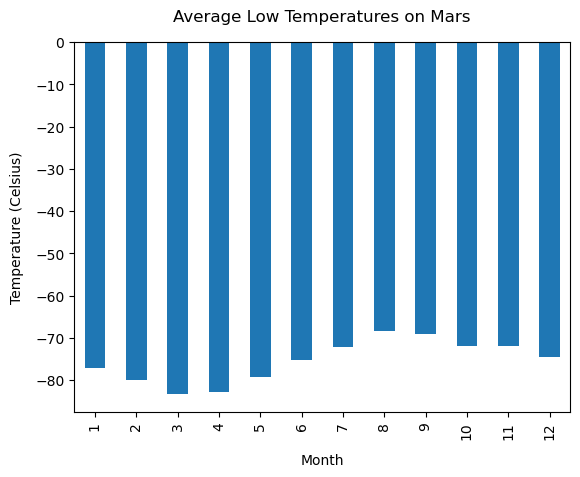

In [191]:
# Plot the average low temperature by month

mars_min_temps.plot.bar()

# Get the current Axes object (to set the appropriate label padding)
ax = plt.gca()  # Get the current Axes object

# Set padding on the x-axis label
ax.set_xlabel('Month', labelpad=10) 
ax.set_ylabel('Temperature (Celsius)', labelpad=8) 

plt.title('Average Low Temperatures on Mars', pad = 15)

# display the plot
plt.show()

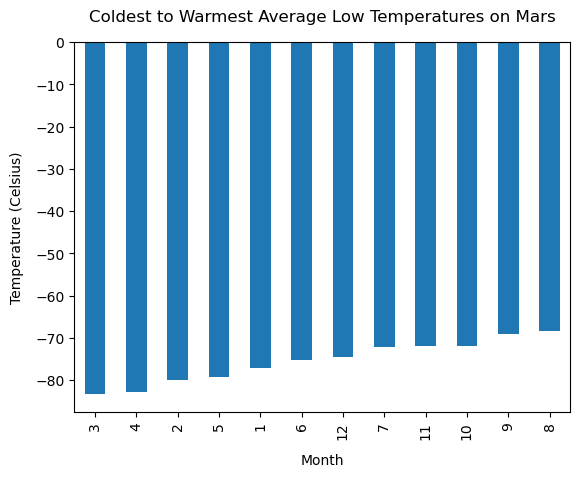

The coldest temperature on Mars is -83.30729166666667 in month 3.
The warmest temperature on Mars is -68.38297872340425 in month 8.


In [192]:
# Identify the coldest and hottest months at Curiosity's location

# First plot the average low temperature by month

# sort the temperatures in ascending order
sorted_min_temps = mars_min_temps.sort_values()

# get the coldest month
coldest_month = sorted_min_temps.idxmin()

# get the warmest month
warmest_month = sorted_min_temps.idxmax()

# plot the temperatures
sorted_min_temps.plot.bar()

# Get the current Axes object (to set the appropriate label padding)
ax = plt.gca()  # Get the current Axes object

# Set padding on the x-axis label
ax.set_xlabel('Month', labelpad=10) 
ax.set_ylabel('Temperature (Celsius)', labelpad=8) 

plt.title('Coldest to Warmest Average Low Temperatures on Mars', pad = 15)

# display the plot
plt.show()

# print the coldest and warmest months
print(f"The coldest temperature on Mars is {min(sorted_min_temps)} in month {coldest_month}.")
print(f"The warmest temperature on Mars is {max(sorted_min_temps)} in month {warmest_month}.")


In [193]:
#4.  Which months have the lowest and the highest atmospheric pressure on Mars? 

# First find the average daily atmospheric pressure by Martian month.

mars_pressure = mars_temps_df.groupby('month')['pressure'].mean()

# print the averages

print(mars_pressure)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


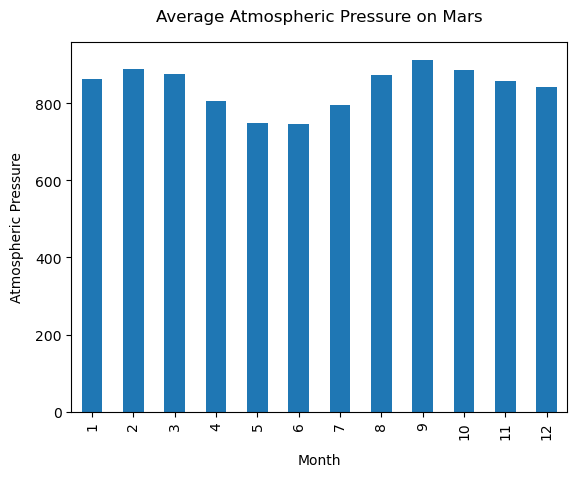

In [196]:
# Plot the average atmospheric pressure by month

mars_pressure.plot.bar()

# Get the current Axes object (to set the appropriate label padding)
ax = plt.gca()  # Get the current Axes object

# Set padding on the x-axis label
ax.set_xlabel('Month', labelpad=10) 
ax.set_ylabel('Atmospheric Pressure', labelpad=8) 

plt.title('Average Atmospheric Pressure on Mars', pad = 15)

# display the plot
plt.show()

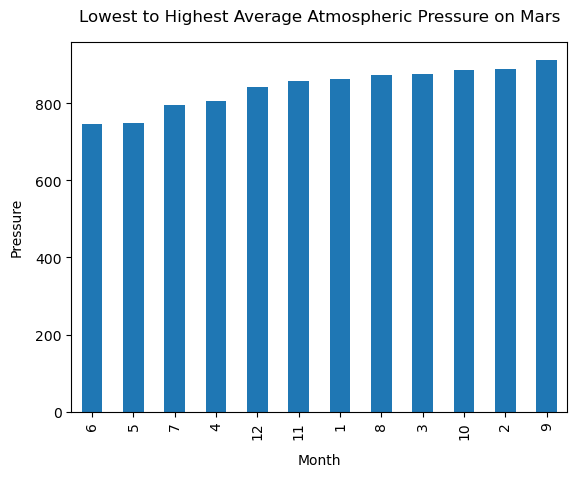

The lowest atmospheric pressure on Mars is 745.0544217687075 in month 6.
The highest atmospheric pressure on Mars is 913.3059701492538 in month 9.


In [198]:
# Identify the lowest and highest atmospheric pressure at Curiosity's location

# First plot the average atmospheric pressure by month, sorted by ascending pressure

# sort the atmospheric pressure in ascending order
sorted_pressure = mars_pressure.sort_values()

# get the lowest atmospheric pressure month
lowest_pressure_month = sorted_pressure.idxmin()

# get the highest atmospheric pressure month
highest_pressure_month = sorted_pressure.idxmax()

# plot the temperatures
sorted_pressure.plot.bar()

# Get the current Axes object (to set the appropriate label padding)
ax = plt.gca()  # Get the current Axes object

# Set padding on the x-axis label
ax.set_xlabel('Month', labelpad=10) 
ax.set_ylabel('Pressure', labelpad=8) 

plt.title('Lowest to Highest Average Atmospheric Pressure on Mars', pad = 15)

# display the plot
plt.show()

# print the lowest and the highest months
print(f"The lowest atmospheric pressure on Mars is {min(sorted_pressure)} in month {lowest_pressure_month}.")
print(f"The highest atmospheric pressure on Mars is {max(sorted_pressure)} in month {highest_pressure_month}.")


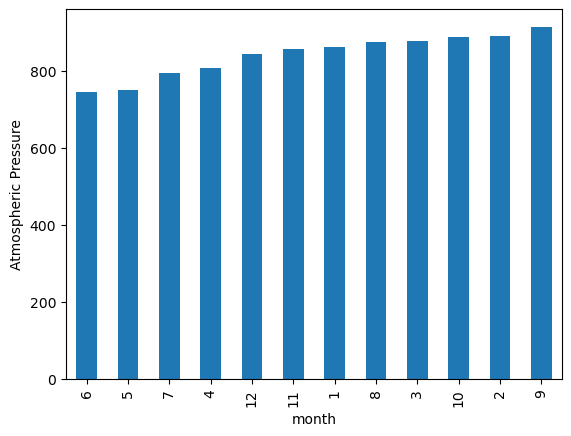

In [18]:
# Plot the average pressure by month


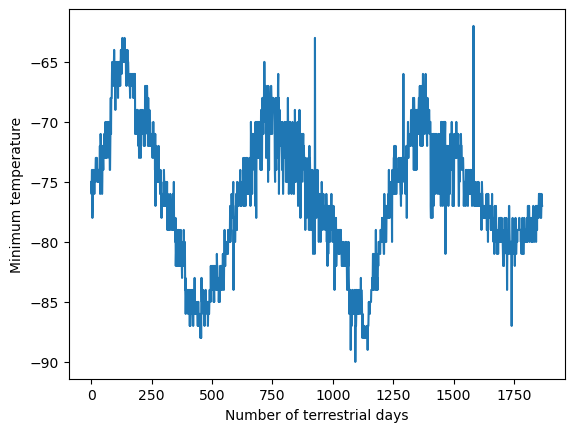

In [19]:
# 5. How many terrestrial (earth) days are there in a Martian year?


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [20]:
# Write the data to a CSV


In [21]:
browser.quit()